In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
%matplotlib inline
import pandas as pd

## Kinetics in the FES model
We use the denaturant dependent thermodynamics to estimate kinetics at different final denaturant concentrations.

In [3]:
R = 8.314e-3 # kJ/mol/K

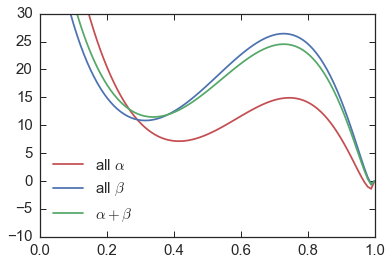

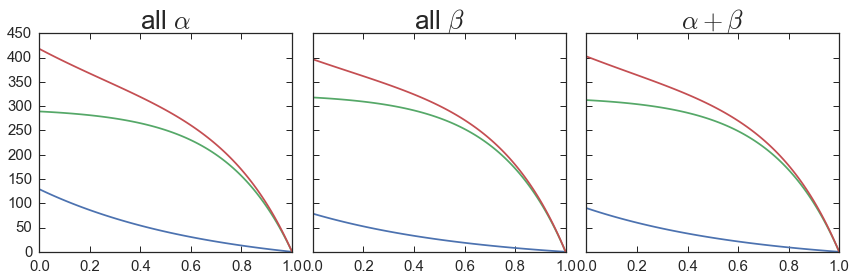

In [4]:
from prefur import kinetics

fig1 ,ax1 = plt.subplots()
fig2 ,ax2 = plt.subplots(1,3, sharey=True, sharex=True, figsize=(12,4))
nres = 60

kf, ku, FES = kinetics.predict(nres=nres, struct='a')
ax1.plot(FES.nat, FES.DG, c='r', label=r'all $\alpha$')
ax2[0].plot(FES.nat, FES.DHo_loc)
ax2[0].plot(FES.nat, FES.DHo_nonloc)
ax2[0].plot(FES.nat, FES.DHo)

kf, ku, FES = kinetics.predict(nres=nres, struct='b')
ax1.plot(FES.nat, FES.DG, c='b', label=r'all $\beta$')
ax2[1].plot(FES.nat, FES.DHo_loc)
ax2[1].plot(FES.nat, FES.DHo_nonloc)
ax2[1].plot(FES.nat, FES.DHo)

kf, ku, FES = kinetics.predict(nres=nres, struct='ab')
ax1.plot(FES.nat, FES.DG, c='g', label=r'$\alpha+\beta$')
ax2[2].plot(FES.nat, FES.DHo_loc)
ax2[2].plot(FES.nat, FES.DHo_nonloc)
ax2[2].plot(FES.nat, FES.DHo)

ax1.set_ylim(-10,30)
ax2[0].set_title(r'all $\alpha$', fontsize=26)
ax2[1].set_title(r'all $\beta$', fontsize=26)
ax2[2].set_title(r'$\alpha+\beta$', fontsize=26)
fig2.tight_layout(w_pad=0)
ax1.legend(loc=3)

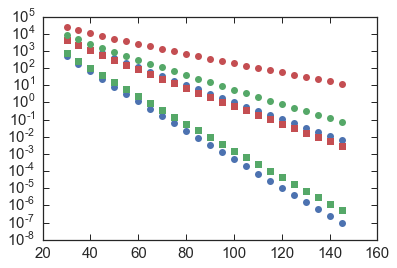

In [5]:
from prefur import kinetics

fold_rates = []
for n in range(30, 150, 5):
    kf, ku, FES = kinetics.predict(nres=n, struct='b')
    fold_rates.append([kf, ku])
fold_rates = np.array(fold_rates)
plt.semilogy(range(30, 150, 5), fold_rates[:,0], 'bo')
plt.semilogy(range(30, 150, 5), fold_rates[:,1], 'bo')

fold_rates = []
for n in range(30, 150, 5):
    kf, ku, FES = kinetics.predict(nres=n, struct='a')
    fold_rates.append([kf, ku])
fold_rates = np.array(fold_rates)
plt.semilogy(range(30, 150, 5), fold_rates[:,0], 'ro')
plt.semilogy(range(30, 150, 5), fold_rates[:,1], 'rs')

fold_rates = []
for n in range(30, 150, 5):
    kf, ku, FES = kinetics.predict(nres=n, struct='ab')
    fold_rates.append([kf, ku])
fold_rates = np.array(fold_rates)
plt.semilogy(range(30, 150, 5), fold_rates[:,0], 'go')
plt.semilogy(range(30, 150, 5), fold_rates[:,1], 'gs')


In [6]:
DataBase = pd.read_excel('../prefur/data/newdatabase298Cm.xls')

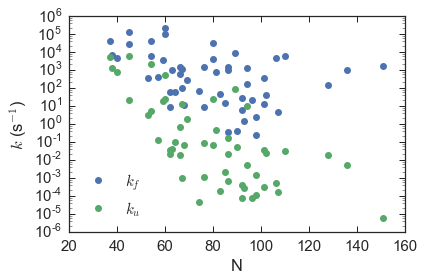

In [7]:
fig, ax = plt.subplots()
ax.semilogy(DataBase.Size, DataBase.kfexp, 'o', label=r'$k_f$')
ax.semilogy(DataBase.Size, DataBase.kuexp, 'o', label=r'$k_u$')
ax.set_xlabel('N')
ax.set_ylabel(r'$k$ (s$^{-1}$) ')
ax.legend(loc=3)
plt.tight_layout()

In [9]:
def ind_to_char(s):
    if s == 1:
        return "a"
    if s == 2:
        return "b"
    elif s == 3:
        return "ab"
nres = DataBase.SizePDB.as_matrix()
struct = DataBase.Structure.as_matrix()
kfold  = []
kunfold  = []
for n, s in zip(nres, struct):
    c = ind_to_char(s)
    kf, ku, FES = kinetics.predict(nres=n, struct=c)
    kfold.append(kf)
    kunfold.append(ku)

In [13]:
kf1st = DataBase.kfexp*np.exp(-(DataBase.mfexp/(R*DataBase.Temp)*DataBase.D1st))
ku1st = DataBase.kuexp*np.exp(-(DataBase.muexp/(R*DataBase.Temp)*DataBase.D1st))

R(kf) = 0.7942


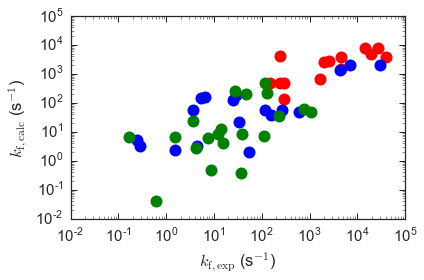

In [35]:
fig, ax = plt.subplots()
ax.loglog(kf1st, kfold, 'o')
colors = [None, 'red', 'blue', 'green']
for i in range(1,4):
    sel = [x for x in range(len(DataBase.Structure)) if DataBase.Structure[x]==i]
    ax.loglog(np.array(kf1st)[sel], np.array(kfold)[sel], 'o', ms=12, c=colors[i])

ax.set_xlabel(r'$k_\mathrm{f,exp}$ (s$^{-1}$) ')
ax.set_ylabel(r'$k_\mathrm{f,calc}$ (s$^{-1}$) ')
ax.set_xlim(1e-2,1e5)
ax.set_ylim(1e-2,1e5)
plt.tight_layout()
print "R(kf) = %6.4f"%np.corrcoef(np.log10(kf1st), np.log10(kfold))[0][1]


R(ku) = 0.7919


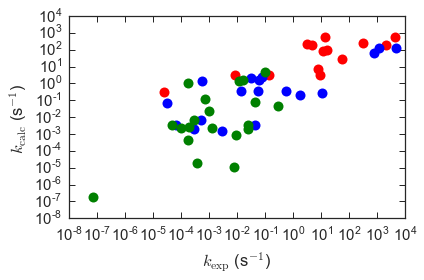

In [34]:
fig, ax = plt.subplots()
#ax.loglog(ku1st, kunfold, 'o')
colors = [None, 'red', 'blue', 'green']
for i in range(1,4):
    sel = [x for x in range(len(DataBase.Structure)) if DataBase.Structure[x]==i]
    ax.loglog(np.array(ku1st)[sel], np.array(kunfold)[sel], 'o', ms=10, c=colors[i])

ax.set_xlabel(r'$k_\mathrm{exp}$ (s$^{-1}$) ')
ax.set_ylabel(r'$k_\mathrm{calc}$ (s$^{-1}$) ')
plt.tight_layout()
ax.set_xlim(1e-8,1e4)
ax.set_ylim(1e-8,1e4)
print "R(ku) = %6.4f"%np.corrcoef(np.log10(ku1st), np.log10(kunfold))[0][1]